# Table des matières

### MODELISATION
    
* [Etape 2 - Itération 1](#chapter2)
    * [Fonction modelisation](#section_2_1)
    * [Préparation données](#section_2_2)    
        * [Variable à expliquer](#section_2_2_1)
        * [Variables quantitatives](#section_2_2_2)
        * [Variables categorielles](#section_2_2_3)
        * [Variable textuelle](#section_2_2_4)        
    * [Prédiction avec différents modèles de classification](#section_2_3)              
        * [Regression Logistique](#section_2_3_1)       
        * [Arbre de decision (GradientBoosting)](#section_2_3_2)
        * [Random Forest](#section_2_3_3)   
        * [KNN](#section_2_3_4)  
        * [DecisionTree](#section_2_3_5) 
        * [Adaboost](#section_2_3_6) 
                

* [Etape 3 - Itération 2](#chapter3)
    * [Ajout d'une nouvelle variable video](#section_3_1)
        * [Analyse univariée ( dataviz)](#section_3_1_1)
        * [Analyse multivariée : test statistique (chi2) ](#section_3_1_2)
    * [Recherche d'une autre méthode d'encodage ](#section_3_2)
    * [Prédiction avec 2 modèles retenus](#section_3_7)  
         * [Regression Logistique](#section_3_7_1)
         * [Random Forest](#section_3_7_2)
    * [Hyperparamètres et Validation croisee](#section_3_8)                      
         * [Regression logistique](#section_3_8_1)
         * [Random Forest](#section_3_8_2)
    * [Interprétabilité des modèles](#section_3_9)                               
         * [Régression logistique](#section_3_1_2)
         * [Random Forest](#section_3_9_2)
    * [Analyse des modèles selon l'axe temporel](#section_3_10)                               
         * [Régression logistique](#section_3_10_1)
         * [Random Forest](#section_3_10_2)
        
        
* [Etape 4 - Prédiction des campagnes de statut 'live'](#chapter4)        
    * [Préparation des données](#section_4_1)
        * [Variable à expliquer](#section_4_1_1)
        * [Variables quantitatives](#section_4_1_2)
        * [Variables catégorielles](#section_4_1_3)
        * [Variable textuelle](#section_4_1_4)    
    * [Prédiction via Regression Logistique binaire](#section_4_2)
    * [Prédiction via Random Forest](#section_4_3)
    
    
    


# Etape 1 - Exploration des données

Dans cette étape, nous allons : 
- charger les jeux de données utiles à notre étude,
- analyser et supprimer les doublons,
- chercher et traiter les éventuelles valeurs manquantes,
- introduire de nouvelles variables utiles dans le dataset.

In [1]:
#Import de toutes les biliothèques nécesssaires au projet

#Bibliothèques communes
import pandas as pd
import numpy as np
from datetime import datetime
import math
from time  import time
import glob

#Data viz
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Webscraping
import json
import requests
from bs4 import BeautifulSoup


#Text mining
from nltk.tokenize import word_tokenize# Passing the string text into word tokenize for breaking the sentences
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from  sklearn.feature_extraction.text import CountVectorizer

#Tests statistiques
import scipy.stats as st

#Machine learning
from sklearn import model_selection
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Modèles machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Métriques modèles machine learning
from sklearn.metrics           import f1_score, confusion_matrix, classification_report
from sklearn.model_selection   import learning_curve


## Sources de données

Pour notre étude, nous disposons de plusieurs datasets : l'un disponible sur le site **Kaggle**, l'autre sur le site **Webrobots.**<br>
Nous utiliserons en grande partie le dataset provenant du site Kaggle, et nous exploiterons également certaines données pertinentes provenant du dataset provenant du site Webrobots.

### Source de données n°1 : Dataset Kaggle
Nous commençons par charger le jeu de données fourni par le site Kaggle (https://www.kaggle.com/yashkantharia/kickstarter-campaigns-dataset-20) dans un DataFrame appelé **df**.<br>
Ce dataframe recense les **campagnes de financement** lancées via la plate-forme américaine **Kickstarter** entre 2009 et 2020.

In [2]:
#Chargement du fichier csv et création du dataframe appelé df

path = '$PATH'
file = 'Kaggle_Kickstarter_Dataset.csv'

df=pd.read_csv(path+file, index_col=0, encoding='UTF-8',decimal=".")
df.head(3)

,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0


In [3]:
#Affichage des informations principales de df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217245 entries, 0 to 217252
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             217245 non-null  int64  
 1   name           217245 non-null  object 
 2   currency       217245 non-null  object 
 3   launched_at    217245 non-null  object 
 4   backers_count  217245 non-null  int64  
 5   blurb          217245 non-null  object 
 6   country        217245 non-null  object 
 7   deadline       217245 non-null  object 
 8   slug           217245 non-null  object 
 9   status         217245 non-null  object 
 10  usd_pledged    217245 non-null  float64
 11  sub_category   217245 non-null  object 
 12  main_category  217245 non-null  object 
 13  creator_id     217245 non-null  int64  
 14  blurb_length   217245 non-null  int64  
 15  goal_usd       217245 non-null  float64
 16  city           217245 non-null  object 
 17  duration       217245 non-nul

In [4]:
#Affichage des variables de df
df.columns

Index(['id', 'name', 'currency', 'launched_at', 'backers_count', 'blurb',
       'country', 'deadline', 'slug', 'status', 'usd_pledged', 'sub_category',
       'main_category', 'creator_id', 'blurb_length', 'goal_usd', 'city',
       'duration'],
      dtype='object')

In [5]:
#Affichage des dimensions de df
df.shape

(217245, 18)

### Liste des variables

**A) <u>Variables Quantitatives :**</u>
 - 'blurb_length' : longueur du slogan (en nombre de lettres)
 - 'goal_usd' : objectif de la campagne de financement (en dollars)
 - 'duration' : durée de la campagne (en jours)

**B) <u>Variables Catégorielles :**</u>
- 'name'
- 'currency'
- 'launched_at' : 'launched_year', 'launched_month'
- 'blurb'
- 'country',
- 'city'
- 'deadline'
- 'slug'
- 'main_category'
- 'sub_category'
  
**C) <u>Variable Cible :**</u>
- 'status'

### Source de données n°2 : Datasets Webrobots<a class="anchor" id="section_1_1_2"></a>
Les jeux de données fournis par le site Webrobots (source : https://webrobots.io/kickstarter-datasets/) contiennent également des données intéressantes, que nous allons pouvoir ajouter à notre dataset d'étude (source Kaggle).<br> 
<br>
Nous chargeons les données du site Webrobots dans un DataFrame appelé **df_webrobots.**

In [6]:
path = '$PATH'

#On charge le fichier Kickstarter dont le nom n'est pas suivi d'un numéro
file = 'Kickstarter.csv'
df_webrobots = pd.read_csv(path+file,index_col=0, encoding='UTF-8',decimal=".")


In [7]:
#Affichage des informations de df_webrobots
df_webrobots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3664 entries, 28 to 43
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   blurb                     3664 non-null   object 
 1   category                  3664 non-null   object 
 2   converted_pledged_amount  3664 non-null   int64  
 3   country                   3664 non-null   object 
 4   country_displayable_name  3664 non-null   object 
 5   created_at                3664 non-null   int64  
 6   creator                   3664 non-null   object 
 7   currency                  3664 non-null   object 
 8   currency_symbol           3664 non-null   object 
 9   currency_trailing_code    3664 non-null   bool   
 10  current_currency          3664 non-null   object 
 11  deadline                  3664 non-null   int64  
 12  disable_communication     3664 non-null   bool   
 13  friends                   0 non-null      float64
 14  fx_rate  

In [8]:
#On charge les fichiers csv dont le nom est de type Kickstarter'+'0xx' en utilisant la library glob et on les fusionne avec df_webrobots

all_files = glob.glob(path + "Kickstarter0*.csv")

for file in all_files:
    df_temp = pd.read_csv(file, encoding='UTF-8',decimal=".")
    df_webrobots=pd.concat([df_webrobots,df_temp])

In [9]:
#On supprime à nouveau les doublons id
df_webrobots = df_webrobots.drop_duplicates(subset=['id'], keep='first')

print(df_webrobots.shape)

(196712, 39)


In [10]:
df_webrobots.head(5)

,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,backers_count
28,"For our 2nd full length album, we have decided...","{""id"":40,""name"":""Indie Rock"",""analytics_name"":...",1315,US,the United States,1380457620,"{""id"":1045564870,""name"":""Brody & The Busch Rd....",USD,$,True,...,True,False,successful,1399507237,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,1315.0,international,NaN
19,Help me get these new songs mixed and mastered!,"{""id"":38,""name"":""Electronic Music"",""analytics_...",862,US,the United States,1471457593,"{""id"":601906188,""name"":""Jared Farrell"",""slug"":...",USD,$,True,...,False,False,failed,1474400808,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,862.0,international,NaN
60,The Eroica Trio wants to commission a new trio...,"{""id"":36,""name"":""Classical Music"",""analytics_n...",12194,US,the United States,1361319424,"{""id"":413470524,""name"":""The Eroica Trio"",""is_r...",USD,$,True,...,True,False,successful,1383364741,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,12194.0,international,NaN
0,A new twist on classic hymns. Imagine the son...,"{""id"":38,""name"":""Electronic Music"",""analytics_...",0,US,the United States,1447005290,"{""id"":885138698,""name"":""Steven Bower"",""is_regi...",USD,$,True,...,False,False,failed,1449600458,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,0.0,international,NaN
0,Spam studios for the up and coming youth of We...,"{""id"":319,""name"":""Kids"",""analytics_name"":""Kids...",0,GB,the United Kingdom,1403696868,"{""id"":525583114,""name"":""Adam Poules"",""is_regis...",GBP,£,False,...,False,False,failed,1408746101,1.714466,"{""web"":{""project"":""https://www.kickstarter.com...",1.657803,0.0,international,NaN


In [11]:
df.head(5)

,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0
3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,glassweb-internet-monitoring,failed,222.000000,technology,Gadgets,1458852038,69,25000.00000,Chicago,60.0
4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,"Madrid's low power FM community radio station,...",US,2015-12-19 20:36:01,dreaming-of-streaming-969-fm-kmrd-lp-madrid-ne...,successful,5410.000000,publishing,Radio & Podcasts,1845213665,131,5000.00000,Madrid,30.0


In [12]:
#Dans df_webrobots, on ne garde que les variables 'id' et urls
df_webrobots = df_webrobots.drop(['backers_count','blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code','spotlight',
       'current_currency', 'deadline', 'disable_communication', 'friends',''
       'fx_rate', 'goal', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'usd_pledged',
       'usd_type'], axis = 1)

In [13]:
#Affichage des informations de df_webrobots
df_webrobots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196712 entries, 28 to 1163
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 196712 non-null  int64  
 1   urls               196712 non-null  object 
 2   usd_exchange_rate  196712 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ MB


## Processing


#### Analyse et suppression des doublons

In [14]:
#Recherche de doublons
df['id'].duplicated().sum()

24357

In [15]:
#Suppression des doublons
df.drop_duplicates()

,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0
3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,glassweb-internet-monitoring,failed,222.000000,technology,Gadgets,1458852038,69,25000.00000,Chicago,60.0
4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,"Madrid's low power FM community radio station,...",US,2015-12-19 20:36:01,dreaming-of-streaming-969-fm-kmrd-lp-madrid-ne...,successful,5410.000000,publishing,Radio & Podcasts,1845213665,131,5000.00000,Madrid,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217248,1438234172,Adventures of a Lost Poet,USD,2017-05-31 17:37:07,1,My VERY FIRST book. Chronicling my journey dea...,US,2017-07-15 17:37:07,adventures-of-a-lost-poet,failed,10.000000,publishing,Poetry,1049486300,125,500.00000,Hollywood,45.0
217249,906168648,Lomak - Animated Movie / Series,GBP,2015-01-28 16:43:38,6,About a powerful soldier who is nurtured from ...,GB,2015-03-19 15:43:38,lomak-animated-movie-series,failed,244.588849,film & video,Animation,2096189858,90,40621.01400,London,50.0
217250,708119891,Growing with our people - Gastronomy (Canceled),MXN,2017-07-29 03:07:34,5,We give Mexican producers an opportunity to pr...,MX,2017-09-15 15:00:00,orocafoods-with-mexican-love,canceled,287.559221,food,Farmer's Markets,2013704740,109,17662.55400,Mexico City,48.0
217251,239852131,Carmel - Second Wife Blues | Sad Situation CD ...,GBP,2015-08-30 21:17:44,51,A limited edition CD run of 1000 copies of Car...,GB,2015-09-24 21:17:44,carmel-second-wife-blues-sad-situation-cd-single,successful,1683.874823,music,Blues,197599039,110,1354.03380,London,25.0


In [16]:
#Suppression des doublons au sein de la colonne 'id'
df = df.drop_duplicates(subset=['id'], keep='last').copy()
df.head(3)

,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0
3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,glassweb-internet-monitoring,failed,222.000000,technology,Gadgets,1458852038,69,25000.00000,Chicago,60.0


In [17]:
#On recompte à nouveau le nombre de doublons dans la colonne id
df['id'].duplicated().sum()

0

In [18]:
#On vérifie s'il y a des valeurs manquantes
df.isna().sum()

id               0
name             0
currency         0
launched_at      0
backers_count    0
blurb            0
country          0
deadline         0
slug             0
status           0
usd_pledged      0
sub_category     0
main_category    0
creator_id       0
blurb_length     0
goal_usd         0
city             0
duration         0
dtype: int64

#### Ajout de nouvelles variables temporelles

In [19]:
#On convertit les colonnes 'launched_at' et 'deadline' en format datetime
df['launched_at'] = pd.to_datetime(df['launched_at'])
df['deadline'] = pd.to_datetime(df['deadline'])

df['launched_year']= df['launched_at'].dt.year
df['launched_month']= df['launched_at'].dt.month
df['launched_quarter']= df['launched_at'].dt.quarter


In [20]:
#On compte le nombre de campagnes par statut dans df
df['status'].value_counts()

successful    105098
failed         75579
canceled        9284
live            2927
Name: status, dtype: int64

In [21]:
df.head(5)

,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,...,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration,launched_year,launched_month,launched_quarter
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,...,food,Farms,41046209,122,785.82065,Victoria,60.0,2018,2,1
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,...,publishing,Academic,1877377173,35,93.00000,San Diego,24.0,2014,11,4
3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,glassweb-internet-monitoring,failed,...,technology,Gadgets,1458852038,69,25000.00000,Chicago,60.0,2019,5,2
4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,"Madrid's low power FM community radio station,...",US,2015-12-19 20:36:01,dreaming-of-streaming-969-fm-kmrd-lp-madrid-ne...,successful,...,publishing,Radio & Podcasts,1845213665,131,5000.00000,Madrid,30.0,2015,11,4
5,1184883770,The Breaks Season 1.5 (Episodes 4-9),USD,2014-03-14 20:56:54,106,The Breaks is a web series about a sports card...,US,2014-04-15 00:17:00,the-breaks-season-15-episodes-4-9,successful,...,film & video,Webseries,2129431571,134,4000.00000,Los Angeles,31.0,2014,3,1


#### Ajout d'une nouvelle variable  'urls'

Les jeux de données fournis par le site Webrobots présentent une donnée intéressante mais absente dans le dataset fourni par le site Kaggle ; il s'agit de la **variable 'urls'.** Celle-ci nous servira ultérieurement pour faire du webscraping.

Nous allons donc ajouter cette information à notre dataset df.

In [22]:
#On fusionne df avec df_webrobots 
df= df.merge(df_webrobots, on='id', how='left')
df.index = df.index
print(df.shape)

df.tail(3)

(192888, 23)


,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,...,creator_id,blurb_length,goal_usd,city,duration,launched_year,launched_month,launched_quarter,urls,usd_exchange_rate
192885,708119891,Growing with our people - Gastronomy (Canceled),MXN,2017-07-29 03:07:34,5,We give Mexican producers an opportunity to pr...,MX,2017-09-15 15:00:00,orocafoods-with-mexican-love,canceled,...,2013704740,109,17662.5540,Mexico City,48.0,2017,7,3,"{""web"":{""project"":""https://www.kickstarter.com...",0.055909
192886,239852131,Carmel - Second Wife Blues | Sad Situation CD ...,GBP,2015-08-30 21:17:44,51,A limited edition CD run of 1000 copies of Car...,GB,2015-09-24 21:17:44,carmel-second-wife-blues-sad-situation-cd-single,successful,...,197599039,110,1354.0338,London,25.0,2015,8,3,"{""web"":{""project"":""https://www.kickstarter.com...",1.525416
192887,1126079486,Tick-Tock,USD,2015-02-04 05:08:07,34,A passion project focusing on bullying and its...,US,2015-03-03 20:00:00,tick-tock,successful,...,1667603717,61,2800.0000,Hollywood,28.0,2015,2,1,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000


In [23]:
#On vérifie s'il y a des valeurs manquantes
df.isna().sum()

id                      0
name                    0
currency                0
launched_at             0
backers_count           0
blurb                   0
country                 0
deadline                0
slug                    0
status                  0
usd_pledged             0
sub_category            0
main_category           0
creator_id              0
blurb_length            0
goal_usd                0
city                    0
duration                0
launched_year           0
launched_month          0
launched_quarter        0
urls                 8934
usd_exchange_rate    8934
dtype: int64

In [24]:
#On supprime les lignes contenant des valeurs manquantes
df=df.dropna()

## Analyse univariée 

##### Variable Statut (status)

In [25]:
#Campagnes de statut 'live'
#Les campagnes qui sont en statut 'live' seront utilisées ultérieurement pour la vérification de 
#notre modèle de prédiction, car il désormais possible de connaitre leur statut final (failed ou 
#successful) en allant sur le site Kickcstarter

df_live =df.loc[df.status == 'live']

#Campagnes de statut 'canceled
#Les campagnes de statut 'canceled' représentent 4.81% du nombre total de campagnes, on choisit de les regrouper 
#avec les campagnes de statut 'failed'

df['status']=df['status'].replace('canceled','failed')

values=['successful','failed']
df = df[df.status.isin(values)]


In [26]:
#On renumérote les lignes
df=df.reset_index()

##### Variable Objectif (goal_usd) 

In [27]:
#Résumé de la distribution de la variable 'goal_usd'

df['goal_usd'].describe()

count    1.819360e+05
mean     4.411995e+04
std      1.182681e+06
min      1.000000e-02
25%      1.500000e+03
50%      5.000000e+03
75%      1.346685e+04
max      1.354034e+08
Name: goal_usd, dtype: float64

In [28]:
#La variable 'goal_usd' a une distribution très étendue : de 0.01 à 135 403 380 dollars
#On crée donc une nouvelle variable dérivée de 'goal_usd' : 'goal_usd_log' (valeur logarithmique)
#Cela permettra d'afficher les objectifs de toutes les campagnes sur un même graphique.

df['goal_usd_log'] = np.log1p(df['goal_usd'])

df.head(3)

,index,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,...,blurb_length,goal_usd,city,duration,launched_year,launched_month,launched_quarter,urls,usd_exchange_rate,goal_usd_log
0,0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,...,122,785.82065,Victoria,60.0,2018,2,1,"{""web"":{""project"":""https://www.kickstarter.com...",0.79359,6.668000
1,1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,...,35,93.00000,San Diego,24.0,2014,11,4,"{""web"":{""project"":""https://www.kickstarter.com...",1.00000,4.543295
2,2,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,glassweb-internet-monitoring,...,69,25000.00000,Chicago,60.0,2019,5,2,"{""web"":{""project"":""https://www.kickstarter.com...",1.00000,10.126671


In [29]:
#Discrétisation de la variable goal_usd
df['goal_usd_class'] = pd.qcut(df['goal_usd'], 4, labels=['0', '1', '2', '3'])

print(df.shape)
df.head(3)

(181936, 26)


,index,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,...,goal_usd,city,duration,launched_year,launched_month,launched_quarter,urls,usd_exchange_rate,goal_usd_log,goal_usd_class
0,0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,...,785.82065,Victoria,60.0,2018,2,1,"{""web"":{""project"":""https://www.kickstarter.com...",0.79359,6.668000,0
1,1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,...,93.00000,San Diego,24.0,2014,11,4,"{""web"":{""project"":""https://www.kickstarter.com...",1.00000,4.543295,0
2,2,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,glassweb-internet-monitoring,...,25000.00000,Chicago,60.0,2019,5,2,"{""web"":{""project"":""https://www.kickstarter.com...",1.00000,10.126671,3


In [30]:
#Affichage et décompte des modalités de la variable 'goal_usd_class'

print(df['goal_usd_class'].value_counts())

df['goal_usd_class'].value_counts(normalize=True)

1    51894
0    47014
3    45131
2    37897
Name: goal_usd_class, dtype: int64


1    0.285232
0    0.258410
3    0.248060
2    0.208299
Name: goal_usd_class, dtype: float64

##### Variable Catégorie (main_category)

In [31]:
#Dans df, il y a une inversion des noms pour les variables 'main_category' (159 modalités) et 'sub_category' (15 modalités).
#On renomme donc la variable 'main_category' en 'sub_category' et inversement.

df.rename(columns={"sub_category":"main_category", "main_category":"sub_category"}, inplace = True)

# Etape 2  - Itération 1 <a class="anchor" id="chapter2"></a>

L'objectif de l'itération 1 est de **tester plusieurs  modèles de classification  permettant de prédire la réussite des campagnes de financement.**<br> 
Notre variable cible est représentée par la variable ‘status’  :<br> 
- 1 (successful)
- 0 (failed)


## Fonction  modélisation <a class="anchor" id="section_2_1"></a>

La fonction **modélisation** s'utilise de la façon suivante :  

- <u>1er paramètre :</u> un dataframe  des variables explicatives,
- <u>2ème paramètre :</u> un dataframe  contenant uniquement la variable à prédire,
- <u>3ème parametre :</u> une instance d'un modèle de classification.


Puis, avoir :

- séparé les données en 2 jeux (train et test) 

- elle centre et réduit les jeux de données,

- elle entraine le modèle sur le jeu d'entrainement,

- et prédit sur le jeu de test.

A la fin, elle permet d'afficher le rapport de classification.

In [32]:
def modelisation (X, Y, model, standard):
    
    # sépare les données en 2 ensembles train qui constituent les données entrainement (80% de données ) 
    # et test ( données de test 20% de données)
    t0 = time()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
    
    # on centre/reduit les variables
    if standard == True:
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    
    # on entraine le modèle à nos données d'entraienement
    model.fit(X_train,y_train)
    
    #on lance la prédiction sur les données de test
    y_pred = model.predict(X_test)
    
    
    t1 = time() - t0 
    print("Réalisé en {} minutes".format(round(t1/60,3)))
    
    #on affiche le rapport de classification
    print ('Rapport de classification \n',classification_report(y_test,y_pred))

## Préparation données <a class="anchor" id="section_2_2"></a>

Les algorithmes de Machine Learning de Python ne peuvent s’appliquer que sur les données de type numérique et ayant une valeur (les valeurs nulles ou manquantes doivent être soit supprimées du dataset soit remplacées par une valeur par défaut).

### Variable à expliquer <a class="anchor" id="section_2_2_1"></a>

In [33]:
#Conversion des données en type numérique
df = df.replace({False: '0', True: '1','NC': '-1'})

df['status'] = df['status'].replace(['failed'],'0')
df['status'] = df['status'].replace(['successful'],'1')

#Le dataframe y qui contient la variable à expliquer
y = df['status']

### Variables quantitatives <a class="anchor" id="section_2_2_2"></a>

In [34]:
#Le dataframe df_quant ne contient que les variables quantitatives
df_quant = df[['duration',
            'goal_usd_class',
            'blurb_length'
            ,'launched_year'
            ,'launched_month'               
           ]]

In [35]:
#Conversion des variables en float
for i in df_quant.columns:
    df_quant[i] = df_quant[i].astype('int64')

<ipython-input-35-fc5a37ef82c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quant[i] = df_quant[i].astype('int64')


In [36]:
df_quant.isna().sum()

duration          0
goal_usd_class    0
blurb_length      0
launched_year     0
launched_month    0
dtype: int64

### Variables catégorielles <a class="anchor" id="section_2_2_3"></a>

Les 2 variables catégorielles que nous avions choisies sont :
 - **main_category**
 - **country**
 
Elles doivent être « encodées » ou transformées en variables numériques. Pour cela nous utilisons la **méthode get_dummies** pour l’itération 1.

In [37]:
df_cat=df[['main_category','country']]

In [38]:
df_cat.head(5)

,main_category,country
0,food,CA
1,publishing,US
2,technology,US
3,publishing,US
4,film & video,US


In [39]:
#Les variables encodées sont préfixées de 'Encodage-XXX'
df_cat=pd.get_dummies(df_cat, prefix='Encodage')

In [40]:
df_cat.head(5)

,Encodage_art,Encodage_comics,Encodage_crafts,Encodage_dance,Encodage_design,Encodage_fashion,Encodage_film & video,Encodage_food,Encodage_games,Encodage_journalism,...,Encodage_LU,Encodage_MX,Encodage_NL,Encodage_NO,Encodage_NZ,Encodage_PL,Encodage_SE,Encodage_SG,Encodage_SI,Encodage_US
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
#On fusionne df_cat_encodees avec df_quantitatives
df_ml=pd.concat([df_quant,df_cat],axis=1)

In [42]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181936 entries, 0 to 181935
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   duration               181936 non-null  int64
 1   goal_usd_class         181936 non-null  int64
 2   blurb_length           181936 non-null  int64
 3   launched_year          181936 non-null  int64
 4   launched_month         181936 non-null  int64
 5   Encodage_art           181936 non-null  uint8
 6   Encodage_comics        181936 non-null  uint8
 7   Encodage_crafts        181936 non-null  uint8
 8   Encodage_dance         181936 non-null  uint8
 9   Encodage_design        181936 non-null  uint8
 10  Encodage_fashion       181936 non-null  uint8
 11  Encodage_film & video  181936 non-null  uint8
 12  Encodage_food          181936 non-null  uint8
 13  Encodage_games         181936 non-null  uint8
 14  Encodage_journalism    181936 non-null  uint8
 15  Encodage_music   

### Variable textuelle <a class="anchor" id="section_2_2_4"></a>

La variable textuelle est 'blurb' qui décrit de façon sommaire la description d'un projet (en moyenne 125 caractères).

In [43]:
#Algorithme Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords

#A lancer une fois pour installer la liste des mots qu 'on exclut'
#nltk.download('stopwords')

X=df['blurb']

La fonction **nlp_prepare** prend en entrée un dataframe contenant uniquement les données de type texte et retourne une matrice.

Elle constitue une matrice indexée par le nombre de mots (max_features) des mots les plus utilisés de l’ensemble du jeu de données.

In [44]:
def nlp_prepare (X):
    
    final_stopwords_list = stopwords.words('english') 
    vectorizer= CountVectorizer(
                            max_features=500,
                            stop_words=final_stopwords_list,
                            token_pattern= r"[a-zA-Zé]{5,}",
                            analyzer='word',
                            ngram_range=(1,2),
                            #strip_accents = True 
                            #min_df=0.15
                            #max_df=0.50
                            )
    
    return vectorizer.fit_transform(X), vectorizer.vocabulary_
    #vectorizer.get_feature_names())

In [45]:
X_vect,voc=nlp_prepare(X)

In [46]:
X_vect

<181936x500 sparse matrix of type '<class 'numpy.int64'>'
	with 602251 stored elements in Compressed Sparse Row format>

In [47]:
#Affichage du tableau ou sac de mots (avec son index)
sorted(voc.items(),reverse = True,key=lambda t: t[1])

[('youtube', 499),
 ('youth', 498),
 ('young', 497),
 ('years', 496),
 ('written', 495),
 ('writing', 494),
 ('write', 493),
 ('would', 492),
 ('world first', 491),
 ('world', 490),
 ('works', 489),
 ('working', 488),
 ('words', 487),
 ('women', 486),
 ('woman', 485),
 ('without', 484),
 ('within', 483),
 ('winning', 482),
 ('whole', 481),
 ('white', 480),
 ('website', 479),
 ('water', 478),
 ('watch', 477),
 ('wants', 476),
 ('volume', 475),
 ('voice', 474),
 ('visual', 473),
 ('virtual', 472),
 ('vinyl', 471),
 ('videos', 470),
 ('video', 469),
 ('vegan', 468),
 ('using', 467),
 ('urban', 466),
 ('upcoming', 465),
 ('university', 464),
 ('universe', 463),
 ('unique', 462),
 ('ultimate', 461),
 ('twist', 460),
 ('trying', 459),
 ('truck', 458),
 ('travel', 457),
 ('traditional', 456),
 ('track', 455),
 ('together', 454),
 ('today', 453),
 ('times', 452),
 ('thriller', 451),
 ('three', 450),
 ('third', 449),
 ('think', 448),
 ('things', 447),
 ('themed', 446),
 ('theatre', 445),
 ('the

In [48]:
#Nous convertissons la matrice de type Sparse en dataframe afin de pouvoir la fusionner avec les autres dataframes
df_blurb_text=pd.DataFrame.sparse.from_spmatrix(X_vect)

In [49]:
#Exemple d'affichage pour le projet dont id = 1409770586


#Cette campagne de financement contient les mots dont les index sont 
#82(community
#283(needs)
#333(power)
#361(radio)
#390(share)
#490(world)

for i in range(0,500):
    if df_blurb_text.iloc[3,i] ==1:
        print(i)
        

81
283
333
361
390
490


In [50]:
df.head(5)

,index,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,...,goal_usd,city,duration,launched_year,launched_month,launched_quarter,urls,usd_exchange_rate,goal_usd_log,goal_usd_class
0,0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,...,785.82065,Victoria,60.0,2018,2,1,"{""web"":{""project"":""https://www.kickstarter.com...",0.79359,6.668000,0
1,1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,...,93.00000,San Diego,24.0,2014,11,4,"{""web"":{""project"":""https://www.kickstarter.com...",1.00000,4.543295,0
2,2,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,glassweb-internet-monitoring,...,25000.00000,Chicago,60.0,2019,5,2,"{""web"":{""project"":""https://www.kickstarter.com...",1.00000,10.126671,3
3,3,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,"Madrid's low power FM community radio station,...",US,2015-12-19 20:36:01,dreaming-of-streaming-969-fm-kmrd-lp-madrid-ne...,...,5000.00000,Madrid,30.0,2015,11,4,"{""web"":{""project"":""https://www.kickstarter.com...",1.00000,8.517393,1
4,4,1184883770,The Breaks Season 1.5 (Episodes 4-9),USD,2014-03-14 20:56:54,106,The Breaks is a web series about a sports card...,US,2014-04-15 00:17:00,the-breaks-season-15-episodes-4-9,...,4000.00000,Los Angeles,31.0,2014,3,1,"{""web"":{""project"":""https://www.kickstarter.com...",1.00000,8.294300,1


In [51]:
#Permet d'afficher le nombre de fois où les mots apparaissent ; ici le mot à l'index 275 (music) apparait 10 037 fois
df_blurb_text.sum().sort_values(ascending=False)

276    10006
490     9924
6       9739
168     8622
350     6363
       ...  
441      497
383      497
100      497
472      497
186      494
Length: 500, dtype: int64


# Prédiction avec différents modèles de classification<a class="anchor" id="section_2_3"></a>

In [52]:
#Dataframe df_texte_autres contient la variable de type Texte ainsi que variables catégorielles et quantitatives
df_texte_autres=pd.concat([df_ml,df_blurb_text],axis=1)

In [53]:
df_ml.head(5)

,duration,goal_usd_class,blurb_length,launched_year,launched_month,Encodage_art,Encodage_comics,Encodage_crafts,Encodage_dance,Encodage_design,...,Encodage_LU,Encodage_MX,Encodage_NL,Encodage_NO,Encodage_NZ,Encodage_PL,Encodage_SE,Encodage_SG,Encodage_SI,Encodage_US
0,60,0,122,2018,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,0,35,2014,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,60,3,69,2019,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,30,1,131,2015,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,31,1,134,2014,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181936 entries, 0 to 181935
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   duration               181936 non-null  int64
 1   goal_usd_class         181936 non-null  int64
 2   blurb_length           181936 non-null  int64
 3   launched_year          181936 non-null  int64
 4   launched_month         181936 non-null  int64
 5   Encodage_art           181936 non-null  uint8
 6   Encodage_comics        181936 non-null  uint8
 7   Encodage_crafts        181936 non-null  uint8
 8   Encodage_dance         181936 non-null  uint8
 9   Encodage_design        181936 non-null  uint8
 10  Encodage_fashion       181936 non-null  uint8
 11  Encodage_film & video  181936 non-null  uint8
 12  Encodage_food          181936 non-null  uint8
 13  Encodage_games         181936 non-null  uint8
 14  Encodage_journalism    181936 non-null  uint8
 15  Encodage_music   

### Régression Logistique <a class="anchor" id="section_2_3_1"></a>

In [55]:
#Avec toutes les variables
clf = LogisticRegression(
                         random_state=0, 
                         max_iter = 1500,
                         penalty='none')

modelisation(df_texte_autres, y, clf, True)

C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.315 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.68      0.63      0.65     16493
           1       0.71      0.76      0.73     19895

    accuracy                           0.70     36388
   macro avg       0.70      0.69      0.69     36388
weighted avg       0.70      0.70      0.70     36388



In [56]:
#Sans la variable texte
pd.DataFrame(clf.coef_[0],
              index = df_texte_autres.columns, 
              columns = ["importance"]).sort_values( "importance", ascending = False).head(5)

,importance
Encodage_comics,0.272805
128,0.182066
324,0.155192
Encodage_publishing,0.138100
119,0.116088


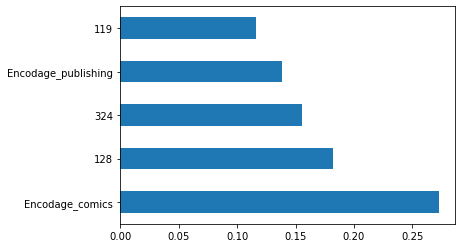

In [57]:
pd.Series(clf.coef_[0], df_texte_autres.columns).sort_values(ascending=False).head(5).plot(kind='barh');

### Arbre de décision (GradientBoosting)<a class="anchor" id="section_2_3_2"></a>

In [58]:
clf = GradientBoostingClassifier(random_state = 0, max_depth = 3)
modelisation(df_texte_autres, y, clf, False)

C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 2.264 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.71      0.62      0.66     16562
           1       0.71      0.79      0.75     19826

    accuracy                           0.71     36388
   macro avg       0.71      0.70      0.70     36388
weighted avg       0.71      0.71      0.71     36388



In [59]:
#On analyse les variables qui ont été importantes dans le modèle
importances = clf.feature_importances_
    
significative = list(importances)
liste_colonnes=df_texte_autres.columns

#On affiche les 5 variables les plus importantes
pd.DataFrame({'Importances': significative}, index = liste_colonnes).sort_values(by = 'Importances', ascending = False).head(5)

,Importances
launched_year,0.220599
goal_usd_class,0.194977
duration,0.165705
Encodage_comics,0.051006
Encodage_food,0.050159


### Random Forest <a class="anchor" id="section_2_3_3"></a>

In [60]:
forest_methode = RandomForestClassifier(random_state = 0)

modelisation(df_texte_autres, y, forest_methode, False)


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 3.719 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70     16427
           1       0.75      0.77      0.76     19961

    accuracy                           0.73     36388
   macro avg       0.73      0.73      0.73     36388
weighted avg       0.73      0.73      0.73     36388



In [61]:
#On analyse les variables qui ont été importantes dans le modèle
importances = forest_methode.feature_importances_
    
significative = list(importances)
liste_colonnes=df_texte_autres.columns

#On affiche les 5 variables les plus importantes
pd.DataFrame({'Importances': significative}, index = liste_colonnes).sort_values(by = 'Importances', ascending = False).head(5)

,Importances
launched_year,0.074450
blurb_length,0.069830
duration,0.069063
launched_month,0.050752
goal_usd_class,0.046682


### KNN<a class="anchor" id="section_2_3_4"></a>

knn = KNeighborsClassifier(n_neighbors=5)

modelisation(df_texte_autres, y, knn, True)

### DecisionTree <a class="anchor" id="section_2_3_5"></a>

In [62]:
from sklearn import tree

tree_methode = tree.DecisionTreeClassifier(random_state=0)                                           
                                          

modelisation(df_texte_autres, y, tree_methode, False)


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.643 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.62      0.62      0.62     16468
           1       0.69      0.69      0.69     19920

    accuracy                           0.66     36388
   macro avg       0.66      0.66      0.66     36388
weighted avg       0.66      0.66      0.66     36388



In [63]:
#On analyse les variables qui ont été importantes dans le modèle
importances = tree_methode.feature_importances_
    
significative = list(importances)
liste_colonnes=df_texte_autres.columns

#On affiche les 5 variables les plus importantes
pd.DataFrame({'Importances': significative}, index = liste_colonnes).sort_values(by = 'Importances', ascending = False).head(5)

,Importances
blurb_length,0.094556
launched_year,0.079383
duration,0.071935
goal_usd_class,0.064386
launched_month,0.060232


### AdaBoost <a class="anchor" id="section_2_3_6"></a>

In [64]:
svm_methode = AdaBoostClassifier(random_state=0)
modelisation(df_texte_autres, y, svm_methode, False)

C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 1.003 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.69      0.63      0.66     16563
           1       0.71      0.76      0.74     19825

    accuracy                           0.70     36388
   macro avg       0.70      0.70      0.70     36388
weighted avg       0.70      0.70      0.70     36388



# Etape 3 - Itération 2 <a class="anchor" id="chapter3"></a>

Dans cette étape, nous allons chercher à <u>optimiser le score des 2 modèles retenus :</u>

- **Régression logistique**
- **Random Forest**

à travers :

    A) L'ajout d’une nouvelle variable :
            analyse univariée
            test statistique chi2

    B) La recherche d’une autre méthode d’encodage

    C) La recherche des hyperparamètres via :
        GridSearchCV 
        RandomizedSearchCV

    D) L'analyse des modèles sur l’axe temporel


## Ajout nouvelle variable vidéo <a class="anchor" id="section_3_1"></a>

La variable vidéo n'étant pas présente dans les datasets d'origine (Kaggle ou webrobots), nous utilisons donc le <u>webscraping afin d'aller chercher cette information sur le site Kickstarter.</u>

En analysant la page web du site Kaggle, nous remarquons que les sites ayant une vidéo ont cette balise :<br>
<<div class''project-image mb2 cf aspect-ratio--object'' data-has-video=''true'' id''video-section''>>

En annexe, on trouvera le code source du webscraping, dont le temps total de traitement est de 187 000 s (soit à peu près une seconde par campagne)

In [67]:
#Les 2 fichiers obtenus suite au webscraping ont été fusionnés en un seul
path = '$PATH'
file='df_webscrapping_video_001.csv'
df_video=pd.read_csv(path+file, encoding='UTF-8',decimal=".",sep=';')

file = 'df_webscrapping_video_002.csv'
df_temp = pd.read_csv(path+file, encoding='UTF-8',decimal=".",sep=';')
df_video=pd.concat([df_video,df_temp])

In [68]:
#Nous profitons de ce webscraping pour récupérer également le statut des projets
#Nous aurons ainsi le statut final des camapgnes 'live' du dataset Kaggle
df_video.rename(columns = {'status':'web_status'}, inplace = True)

In [69]:
#Nous vérifions s'il existe des valeurs manquantes
df_video.isna().sum()

id             0
url            0
web_status    67
video          0
dtype: int64

In [70]:
#Recherche et suppression de doublons
df_video = df_video.drop_duplicates(subset=['id'], keep='last').copy()

In [71]:
#Nous ajoutons la variable vidéo au dataframe principal df 
df=df.merge(df_video, on='id', how='inner').reset_index(drop=True)

In [73]:
#Les valeurs False et True sont remplacées por les valeurs numériques
df= df.replace({False: 0, True: 1})

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181936 entries, 0 to 181935
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              181936 non-null  int64         
 1   id                 181936 non-null  int64         
 2   name               181936 non-null  object        
 3   currency           181936 non-null  object        
 4   launched_at        181936 non-null  datetime64[ns]
 5   backers_count      181936 non-null  int64         
 6   blurb              181936 non-null  object        
 7   country            181936 non-null  object        
 8   deadline           181936 non-null  datetime64[ns]
 9   slug               181936 non-null  object        
 10  status             181936 non-null  object        
 11  usd_pledged        181936 non-null  float64       
 12  main_category      181936 non-null  object        
 13  sub_category       181936 non-null  object  


### Analyse multivariée de la nouvelle variable video<a class="anchor" id="section_3_1_1"></a>

L'ajout de cette nouvelle variable dans notre dataset nécessite que nous étudions sa distribution afin de mieux la "connaitre".<br>
Nous regardons dans un premier temps sa distribution dans le dataset, par rapport aux campagnes réussies et échouées.

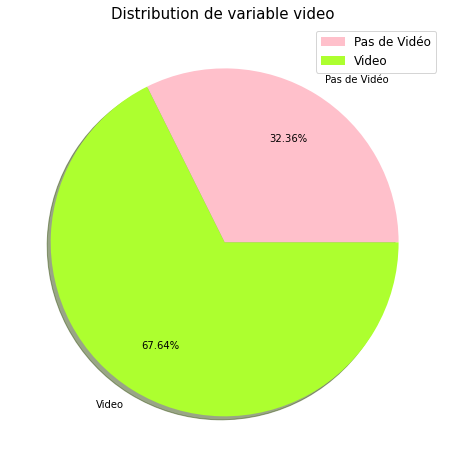

In [75]:
#Affichage de la distribution de la variable 'video'

plt.figure(figsize=(8,8))

df_video_plot = df.groupby(['video']).agg(Nbre=('id', 'count'))
x=df_video_plot['Nbre']
cam=plt.pie(x, labels=['Pas de Vidéo','Video'],
            colors=['pink', 'greenyellow'],
               explode = [0,0],
               labeldistance=1.1,
               autopct= lambda x: str(round(x, 2)) + '%',
               pctdistance = 0.7,shadow = True)

plt.title('Distribution de variable video ',fontsize=15)
plt.legend(loc='upper right',fontsize=12)
plt.show(); 

<u>Commentaires du graphique :</u> environ 2/3 des campagnes de financement ont une vidéo sur leur page web

Nous poursuivons l'analyse et regardons le **taux des campagnes réussies et échouées parmi celles qui ont une vidéo.**

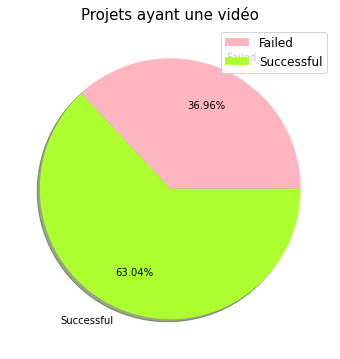

In [76]:
plt.figure(figsize=(6,6))

df_video_plot = df.loc[df['video']==1].groupby(['status']).agg(Nbre=('id', 'count'))

x=df_video_plot['Nbre']

cam=plt.pie(x, labels=['Failed','Successful'],
               colors=['lightpink','greenyellow'],
               explode = [0,0],
               labeldistance=1.1,
               autopct= lambda x: str(round(x, 2)) + '%',
               pctdistance = 0.7,shadow = True)

plt.title('Projets ayant une vidéo',fontsize=15)
plt.legend(loc='upper right',fontsize=12)
plt.show(); 


<u>Commentaire du graphique :</u> parmi les projets ayant une vidéo sur leur page web, environ 63% ont été intégralement financés

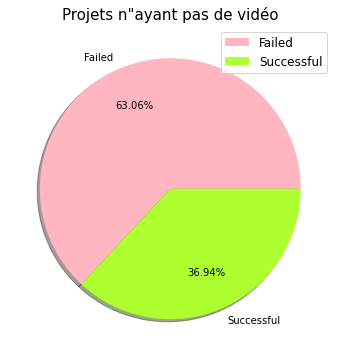

In [77]:
df_video_plot = df.loc[df['video']==0].groupby(['status']).agg(Nbre=('id', 'count'))


plt.figure(figsize=(6,6))

x=df_video_plot['Nbre']

cam=plt.pie(x, labels=['Failed','Successful'],
            colors=['lightpink','greenyellow'],
               explode = [0,0],
               labeldistance=1.1,
               autopct= lambda x: str(round(x, 2)) + '%',
               pctdistance = 0.7,shadow = True)

plt.title('Projets n"ayant pas de vidéo',fontsize=15)
plt.legend(loc='upper right',fontsize=12)
plt.show(); 

<u>Commentaire du graphique :</u> parmi les projets n’ayant pas une vidéo sur leur page web 63% n’ont pas été financés

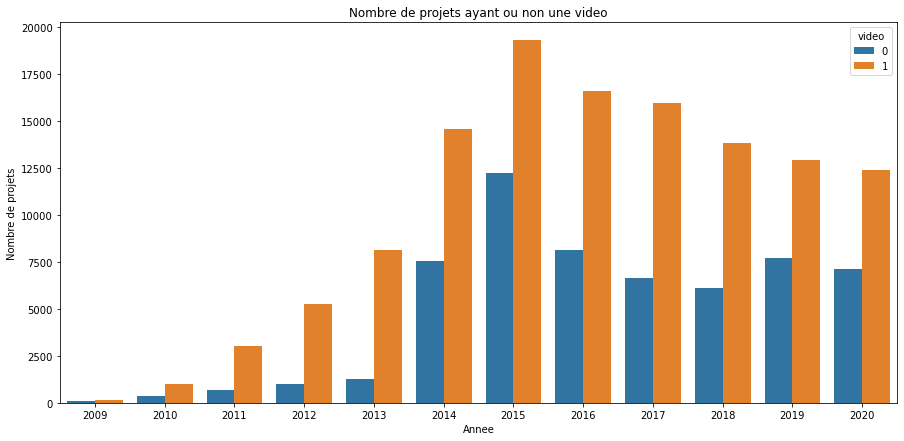

In [78]:
# Distribution de categorie par année
plt.figure(figsize=(15,7))

sns.countplot(x='launched_year',hue='video',data=df)

plt.xlabel('Annee')
plt.ylabel('Nombre de projets')
plt.title ('Nombre de projets ayant ou non une video');

<u>Commentaire du graphique :</u> 

### Analyse multi-variée (test statistique chi2) <a class="anchor" id="section_3_1_2"></a>

La corrélation de cette nouvelle variable avec la variable à expliquer (status) se fait par le test statistique appelé chi2 avec comme hypothèse h0 que les variables sont indépendantes.


In [79]:
#Nous initialsons 2 variables x_video et y_status afin de creér la table de contingence 
x_video="video"
y_status= "status"

df['status']=df['status'].astype('int64')

In [80]:
#Table de contingeance
cont = df[['video', 'status']].pivot_table(index=x_video, columns=y_status, aggfunc=len).fillna(0).copy().astype(int)

cont

status,0,1
video,,
0,37126,21744
1,45485,77581


In [81]:
#La fonction chi2_contingency de la librairie spicy.stats permet de calculer le test du chi2
import scipy.stats as st
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [82]:
#On analyse la variable p-value
st_p

0.0


## Recherche d'une autre méthode d'encodage (frequency methode) <a class="anchor" id="section_3_2"></a>

Les 2 variables catégorielles que nous avions choisies sont :

 - **main_category**
 - **country**
 
Elles doivent être « encodées » ou transformées en variables numériques, pour cela nous utilisons la méthode frequency methode pour l’itération 2.

Cette méthode consiste à utiliser la distribution de la variable en %.

In [83]:
df_cat=df[['main_category','country']]

In [84]:
#Calcul de la distribution de la variable main_category
df_temp=df_cat.copy()
df_temp = df.groupby('main_category').size()/len(df_temp)
df_cat['cat_Freq']=df_cat['main_category'].map(df_temp)

<ipython-input-84-c8447692f6c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['cat_Freq']=df_cat['main_category'].map(df_temp)


In [85]:
#Calcul de la distribution de la variable country
df_temp=df_cat.copy()
df_temp = df.groupby('country').size()/len(df_temp)
df_cat['country_Freq']=df_cat['country'].map(df_temp)

<ipython-input-85-a049b0494bf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['country_Freq']=df_cat['country'].map(df_temp)


In [86]:
#On fusionne df_cat_encodees avec df_quantitatives
df_ml=pd.concat([df_quant,df_cat.loc[:,~df_cat.columns.isin(['main_category','country'])]],axis=1)

Dans notre cas, la pvaleur obtenue par notre échantillon est de 0, ce qui est en dessous du seuil fixé (5%)
On peut donc rejeter l’hypothèse nulle. Les variables « video » et « status » ne sont pas indépendantes. 

Ceci confirme notre intuition , l'influence de la variable vidéo sur  la réussite d'une campagne de financement

In [87]:
#Nous ajoutons au dataframe df_ml qui contient déja les variables quantitatives et catégorielles, la variable vidéo.
df_ml= pd.concat([df_ml,df.video], axis=1)

In [88]:
df_ml.head(5)

,duration,goal_usd_class,blurb_length,launched_year,launched_month,cat_Freq,country_Freq,video
0,60,0,122,2018,2,0.083733,0.046324,1
1,24,0,35,2014,11,0.101833,0.696344,0
2,60,3,69,2019,5,0.105751,0.696344,1
3,30,1,131,2015,11,0.101833,0.696344,1
4,31,1,134,2014,3,0.142028,0.696344,1



## Prédiction avec deux les modèles retenus <a class="anchor" id="section_3_7"></a>

In [89]:
#On fusionne les dataframes et on obtient df_texte_autres qui contient :
#          variables quantitatives
#          variables catégorielles
#          variable texte
df_texte_autres=pd.concat([df_ml,df_blurb_text],axis=1)

In [90]:
df_texte_autres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181936 entries, 0 to 181935
Columns: 508 entries, duration to 499
dtypes: Sparse[int64, 0](500), float64(2), int64(6)
memory usage: 18.0 MB


In [91]:
df_blurb_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181936 entries, 0 to 181935
Columns: 500 entries, 0 to 499
dtypes: Sparse[int64, 0](500)
memory usage: 6.9 MB



### Régression logistique <a class="anchor" id="section_3_7_1"></a>

In [92]:
#Régression logistique

clf = LogisticRegression(random_state=0, max_iter = 1000)

modelisation(df_texte_autres, y, clf, True)

C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.275 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.70      0.65      0.67     16490
           1       0.72      0.77      0.74     19898

    accuracy                           0.71     36388
   macro avg       0.71      0.71      0.71     36388
weighted avg       0.71      0.71      0.71     36388



In [93]:
pd.DataFrame(clf.coef_[0],
              index = df_texte_autres.columns, 
              columns = ["importance"]).sort_values( "importance", ascending = False).head(6)

,importance
video,0.659856
128,0.262509
324,0.195415
country_Freq,0.117565
119,0.111259
215,0.101259


### Random Forest <a class="anchor" id="section_3_7_2"></a>

In [94]:
#Random Forest

clf = RandomForestClassifier(random_state = 0)

modelisation(df_texte_autres, y, clf, False)

C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 3.051 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.74      0.68      0.71     16505
           1       0.75      0.80      0.77     19883

    accuracy                           0.74     36388
   macro avg       0.74      0.74      0.74     36388
weighted avg       0.74      0.74      0.74     36388



In [95]:
pd.DataFrame(clf.feature_importances_,
              index = df_texte_autres.columns, 
              columns = ["importance"]).sort_values( "importance", ascending = False)

,importance
launched_year,0.069786
blurb_length,0.066622
duration,0.065663
goal_usd_class,0.057697
video,0.054599
...,...
400,0.000431
364,0.000350
169,0.000345
409,0.000344


# Hyperparamètres et Validation croisée <a class="anchor" id="section_3_8"></a>

### Régression logistique <a class="anchor" id="section_3_8_1"></a>


t0 = time()

c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

X_train, X_test, y_train, y_test = train_test_split(df_texte_autres, y, test_size = 0.2)
  
logreg = LogisticRegression(random_state=0, max_iter = 1000) 
  
logreg_cv = model_selection.GridSearchCV(logreg, param_grid, cv = 5) 
  

logreg_cv.fit(X_train, y_train) 
  
logreg_cv.score(X_test, y_test)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Meilleur score est {}".format(logreg_cv.best_score_)) 


t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

logreg_cv.score(X_test, y_test)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Meilleur score est {}".format(logreg_cv.best_score_)) 

In [96]:
np.linspace(start = 200, stop = 2000, num = 10)

array([ 200.,  400.,  600.,  800., 1000., 1200., 1400., 1600., 1800.,
       2000.])

#on relance avec les hyperparametres
clf = LogisticRegression(random_state=0, max_iter = 1000,C=11787686.347935867)

modelisation(df_texte_autres, y, clf)

### Random Forest <a class="anchor" id="section_3_8_2"></a>

In [97]:
#Recherche des hyperparamètres pour Random Forest

t0 = time()

X_train, X_test, y_train, y_test = train_test_split(df_texte_autres, y, test_size = 0.2)
    
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

              
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 3, stop = 500, num = 1)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 800, num = 1)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Method of selecting samples for training each tree
bootstrap = [True, False]
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}                                                                
randm = RandomizedSearchCV(estimator=model, 
                           param_distributions = random_grid,
                           cv = 5, 
                           n_iter = 10, 
                           n_jobs=-1)

randm.fit(X_train, y_train)


print(" Resultats pour  Random Search \n" )
print("The best estimator est: ", randm.best_estimator_)
print("le meilleur score  est :", randm.best_score_)
print("The best parameters est:", randm.best_params_)    

randm.score(X_test, y_test)

t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


 Resultats pour  Random Search 

The best estimator est:  RandomForestClassifier(min_samples_leaf=4, min_samples_split=5, n_estimators=3)
le meilleur score  est : 0.716718898001434
The best parameters est: {'n_estimators': 3, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 153.134 secondes


randm.score(X_test, y_test)

clf = RandomForestClassifier(

learning_rate": sp_randFloat(),
               "subsample"    : sp_randFloat(),
               "n_estimators" : sp_randInt(100, 1000),
               "max_depth"    : sp_randInt(4, 10)
)

modelisation(df_texte_autres, y, clf)

In [98]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181936 entries, 0 to 181935
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   duration        181936 non-null  int64  
 1   goal_usd_class  181936 non-null  int64  
 2   blurb_length    181936 non-null  int64  
 3   launched_year   181936 non-null  int64  
 4   launched_month  181936 non-null  int64  
 5   cat_Freq        181936 non-null  float64
 6   country_Freq    181936 non-null  float64
 7   video           181936 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 11.1 MB


Results from Random Search The best estimator across ALL searched params: GradientBoostingClassifier(learning_rate=0.1407480973591687, max_depth=4, n_estimators=808, subsample=0.32270122157735726) The best score across ALL searched params: 0.7297783593686105 The best parameters across ALL searched params: {'learning_rate': 0.1407480973591687, 'max_depth': 4, 'n_estimators': 808, 'subsample': 0.32270122157735726}

## Interprétabilité des modèles<a class="anchor" id="section_3_9"></a>

## Régression logistique<a class="anchor" id="section_3_9_1"></a>

In [99]:
clf = LogisticRegression(random_state=0, 
                         max_iter = 1000, 
                         penalty='none')

modelisation(df_ml, y, clf, True)

Réalisé en 0.008 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.66      0.58      0.62     16632
           1       0.68      0.75      0.71     19756

    accuracy                           0.67     36388
   macro avg       0.67      0.67      0.67     36388
weighted avg       0.67      0.67      0.67     36388



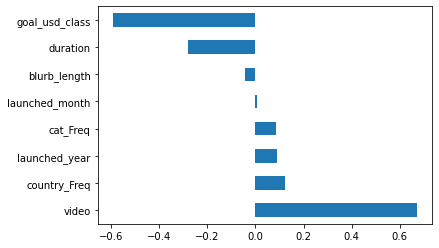

In [100]:
pd.Series(clf.coef_[0], df_ml.columns).sort_values(ascending=False).head(10).plot(kind='barh');

## Random Forest<a class="anchor" id="section_3_9_2"></a>

C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Rapport de classification 
               precision    recall  f1-score   support

           0       0.87      0.26      0.39     20529
           1       0.61      0.97      0.75     24955

    accuracy                           0.65     45484
   macro avg       0.74      0.61      0.57     45484
weighted avg       0.73      0.65      0.59     45484



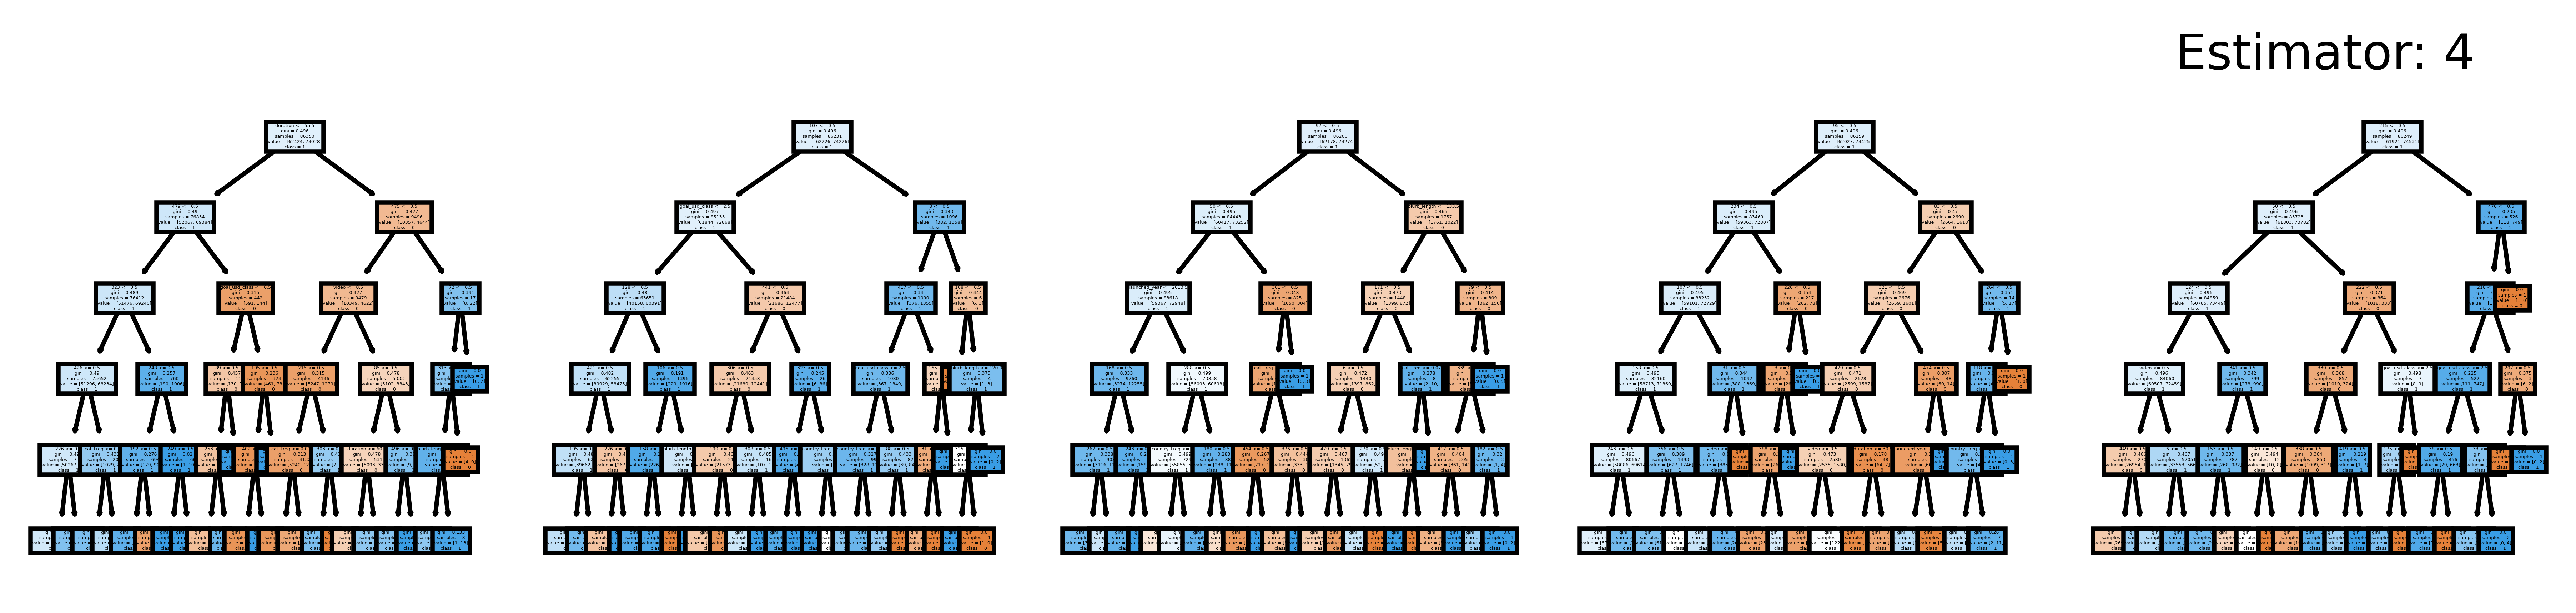

In [101]:
#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df_texte_autres, y, random_state=0)

#Random Forests in 'scikit-learn' (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0,max_depth=5)
rf.fit(X_train, Y_train)

fn=df_texte_autres.columns
cn=y


y_pred = rf.predict(X_test)
print ('Rapport de classification \n',classification_report(Y_test,y_pred))


fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

### Analyse des modèles selon l'axe temporel <a class="anchor" id="section_3_10"></a>

Nous souhaitons étudier l'analyse du score par rapport à la variable année. Chaque modèle est donc lancé sur l'axe du temps en commençant par l'année 2020, et au fur et à mesure nous ajoutons une année supplémentaire.

### Régression logistique <a class="anchor" id="section_3_10_1"></a>

In [102]:
#Modèle Régression Logistique
for n in range(df_texte_autres['launched_year'].max(),df_texte_autres['launched_year'].min()-1,-1):
    x =df_texte_autres.loc[(df_texte_autres['launched_year']>=n)]
    y= df.loc[(df['launched_year']>=n),'status']
    

    clf = LogisticRegression(random_state=0, max_iter = 1000)
    print('Annee est',n)
    modelisation(x, y, clf, True)

Annee est 2020


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.027 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.69      0.53      0.60      1226
           1       0.81      0.89      0.85      2677

    accuracy                           0.78      3903
   macro avg       0.75      0.71      0.72      3903
weighted avg       0.77      0.78      0.77      3903

Annee est 2019


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.043 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.71      0.58      0.64      2893
           1       0.78      0.86      0.82      5139

    accuracy                           0.76      8032
   macro avg       0.75      0.72      0.73      8032
weighted avg       0.76      0.76      0.76      8032

Annee est 2018


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.062 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.69      0.58      0.63      4639
           1       0.76      0.84      0.80      7371

    accuracy                           0.74     12010
   macro avg       0.73      0.71      0.71     12010
weighted avg       0.73      0.74      0.73     12010

Annee est 2017


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.079 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.70      0.61      0.65      7071
           1       0.73      0.80      0.77      9456

    accuracy                           0.72     16527
   macro avg       0.72      0.71      0.71     16527
weighted avg       0.72      0.72      0.72     16527

Annee est 2016


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.112 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.71      0.66      0.68      9766
           1       0.73      0.77      0.75     11706

    accuracy                           0.72     21472
   macro avg       0.72      0.71      0.72     21472
weighted avg       0.72      0.72      0.72     21472

Annee est 2015


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.137 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.72      0.69      0.70     13319
           1       0.72      0.75      0.73     14457

    accuracy                           0.72     27776
   macro avg       0.72      0.72      0.72     27776
weighted avg       0.72      0.72      0.72     27776

Annee est 2014


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.153 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.70      0.69      0.69     15529
           1       0.71      0.73      0.72     16667

    accuracy                           0.71     32196
   macro avg       0.71      0.71      0.71     32196
weighted avg       0.71      0.71      0.71     32196

Annee est 2013


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.176 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.71      0.66      0.69     16100
           1       0.71      0.76      0.73     17974

    accuracy                           0.71     34074
   macro avg       0.71      0.71      0.71     34074
weighted avg       0.71      0.71      0.71     34074

Annee est 2012


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.191 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.70      0.65      0.68     16340
           1       0.72      0.76      0.74     18994

    accuracy                           0.71     35334
   macro avg       0.71      0.71      0.71     35334
weighted avg       0.71      0.71      0.71     35334

Annee est 2011


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.187 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.70      0.64      0.67     16530
           1       0.71      0.77      0.74     19545

    accuracy                           0.71     36075
   macro avg       0.71      0.70      0.70     36075
weighted avg       0.71      0.71      0.71     36075

Annee est 2010


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.199 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.70      0.64      0.67     16436
           1       0.72      0.77      0.75     19908

    accuracy                           0.71     36344
   macro avg       0.71      0.71      0.71     36344
weighted avg       0.71      0.71      0.71     36344

Annee est 2009


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.191 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.69      0.64      0.67     16527
           1       0.72      0.77      0.74     19861

    accuracy                           0.71     36388
   macro avg       0.71      0.70      0.70     36388
weighted avg       0.71      0.71      0.71     36388



### Arbre de décision Random Forest <a class="anchor" id="section_3_10_2"></a>

In [103]:
#Arbre de décision Gradient Boosting
for n in range(df_texte_autres['launched_year'].max(),df_texte_autres['launched_year'].min()-1,-1):
    x =df_texte_autres.loc[(df_texte_autres['launched_year']>=n)]
    y= df.loc[(df['launched_year']>=n),'status']
    

    clf = RandomForestClassifier(random_state = 0)
    print('Annee est',n)
    modelisation(x, y, clf, False)

Annee est 2020


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.178 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.72      0.57      0.63      1194
           1       0.83      0.90      0.86      2709

    accuracy                           0.80      3903
   macro avg       0.77      0.73      0.75      3903
weighted avg       0.79      0.80      0.79      3903

Annee est 2019


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.45 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.75      0.59      0.66      3003
           1       0.78      0.88      0.83      5029

    accuracy                           0.77      8032
   macro avg       0.76      0.74      0.74      8032
weighted avg       0.77      0.77      0.77      8032

Annee est 2018


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 0.712 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.73      0.61      0.66      4755
           1       0.77      0.86      0.81      7255

    accuracy                           0.76     12010
   macro avg       0.75      0.73      0.74     12010
weighted avg       0.75      0.76      0.75     12010

Annee est 2017


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 1.035 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.72      0.65      0.68      6915
           1       0.77      0.81      0.79      9612

    accuracy                           0.75     16527
   macro avg       0.74      0.73      0.74     16527
weighted avg       0.75      0.75      0.75     16527

Annee est 2016


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 1.507 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.72      0.67      0.70      9573
           1       0.75      0.79      0.77     11899

    accuracy                           0.74     21472
   macro avg       0.74      0.73      0.73     21472
weighted avg       0.74      0.74      0.74     21472

Annee est 2015


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 2.123 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.73      0.70      0.71     13312
           1       0.73      0.77      0.75     14464

    accuracy                           0.73     27776
   macro avg       0.73      0.73      0.73     27776
weighted avg       0.73      0.73      0.73     27776

Annee est 2014


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 2.392 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.74      0.70      0.72     15602
           1       0.73      0.77      0.75     16594

    accuracy                           0.74     32196
   macro avg       0.74      0.73      0.73     32196
weighted avg       0.74      0.74      0.74     32196

Annee est 2013


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 2.685 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.74      0.69      0.71     16075
           1       0.74      0.78      0.76     17999

    accuracy                           0.74     34074
   macro avg       0.74      0.74      0.74     34074
weighted avg       0.74      0.74      0.74     34074

Annee est 2012


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 2.809 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.74      0.68      0.71     16310
           1       0.74      0.80      0.77     19024

    accuracy                           0.74     35334
   macro avg       0.74      0.74      0.74     35334
weighted avg       0.74      0.74      0.74     35334

Annee est 2011


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 2.872 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.74      0.68      0.71     16537
           1       0.74      0.80      0.77     19538

    accuracy                           0.74     36075
   macro avg       0.74      0.74      0.74     36075
weighted avg       0.74      0.74      0.74     36075

Annee est 2010


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 3.02 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.74      0.68      0.71     16448
           1       0.75      0.80      0.77     19896

    accuracy                           0.74     36344
   macro avg       0.74      0.74      0.74     36344
weighted avg       0.74      0.74      0.74     36344

Annee est 2009


C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Réalisé en 2.988 minutes
Rapport de classification 
               precision    recall  f1-score   support

           0       0.74      0.68      0.71     16472
           1       0.75      0.80      0.77     19916

    accuracy                           0.75     36388
   macro avg       0.74      0.74      0.74     36388
weighted avg       0.74      0.75      0.74     36388



# Etape 4 - Prédiction des projets de statut "live" <a class="anchor" id="chapter4"></a>


## Préparation des données <a class="anchor" id="section_4_1"></a>

### Variable à expliquer <a class="anchor" id="section_4_1_1"></a>

In [104]:
df_live= df_live.merge(df_video, on='id', how='left')

In [105]:
target_live=df_live['web_status']

### Variables quantitatives <a class="anchor" id="section_4_1_2"></a>

In [106]:
#On discrétise la variable objectif en 4 classes
df_live['goal_usd_class'] = pd.qcut(df_live['goal_usd'], 4, labels=['0', '1', '2', '3'])

In [107]:
df_live.isna().sum()

id                   0
name                 0
currency             0
launched_at          0
backers_count        0
blurb                0
country              0
deadline             0
slug                 0
status               0
usd_pledged          0
sub_category         0
main_category        0
creator_id           0
blurb_length         0
goal_usd             0
city                 0
duration             0
launched_year        0
launched_month       0
launched_quarter     0
urls                 0
usd_exchange_rate    0
url                  0
web_status           1
video                0
goal_usd_class       0
dtype: int64

In [108]:
df_live.web_status.value_counts()

successful    1288
failed         686
canceled        43
Name: web_status, dtype: int64

In [109]:
df_live['web_status']=df_live['web_status'].fillna(0)


df_live['web_status']=df_live['web_status'].replace(['failed'],0)
df_live['web_status']=df_live['web_status'].replace(['successful'],1)
df_live['web_status']=df_live['web_status'].replace(['canceled'],0)


In [110]:
df_quant_live = df_live[['duration',
                        'goal_usd_class',
                        'blurb_length',
                       'launched_year',
                       'launched_month',
                       'video'
                       ]]

In [111]:
df_quant_live.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2017
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   duration        2018 non-null   float64 
 1   goal_usd_class  2018 non-null   category
 2   blurb_length    2018 non-null   int64   
 3   launched_year   2018 non-null   int64   
 4   launched_month  2018 non-null   int64   
 5   video           2018 non-null   bool    
dtypes: bool(1), category(1), float64(1), int64(3)
memory usage: 83.0 KB


In [112]:
for i in df_quant_live.columns:
    df_quant_live[i] = df_quant_live[i].astype('int64')

<ipython-input-112-ead2a0d9ffe5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quant_live[i] = df_quant_live[i].astype('int64')


In [113]:
df_quant_live.tail(5)

,duration,goal_usd_class,blurb_length,launched_year,launched_month,video
2013,30,3,113,2020,12,1
2014,60,2,135,2020,12,0
2015,35,3,61,2020,12,1
2016,21,0,63,2020,11,0
2017,30,0,106,2020,12,0


### Variables catégorielles <a class="anchor" id="section_4_1_3"></a>

In [114]:
#Variables catégorielles
df_cat_live=df_live[['main_category','country']]

In [115]:
df_cat_live.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2017
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   main_category  2018 non-null   object
 1   country        2018 non-null   object
dtypes: object(2)
memory usage: 47.3+ KB


In [116]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181936 entries, 0 to 181935
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   main_category  181936 non-null  object 
 1   country        181936 non-null  object 
 2   cat_Freq       181936 non-null  float64
 3   country_Freq   181936 non-null  float64
dtypes: float64(2), object(2)
memory usage: 5.6+ MB


In [117]:
df_cat_live.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2017
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   main_category  2018 non-null   object
 1   country        2018 non-null   object
dtypes: object(2)
memory usage: 47.3+ KB


In [118]:
df_temp=df_cat_live.copy()
df_temp = df_live.groupby('main_category').size()/len(df_temp)
df_cat_live['cat_Freq']=df_cat_live['main_category'].map(df_temp)

<ipython-input-118-b4c7fe465241>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_live['cat_Freq']=df_cat_live['main_category'].map(df_temp)


In [119]:
df_temp=df_cat_live.copy()
df_temp = df_live.groupby('country').size()/len(df_temp)
df_cat_live['country_Freq']=df_cat_live['country'].map(df_temp)

<ipython-input-119-43bfe0bc160d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_live['country_Freq']=df_cat_live['country'].map(df_temp)


In [120]:
df_cat_live.tail(5)

,main_category,country,cat_Freq,country_Freq
2013,Gadgets,DE,0.029237,0.036174
2014,Restaurants,CA,0.011893,0.052032
2015,3D Printing,US,0.009415,0.529732
2016,Jewelry,GB,0.008424,0.112983
2017,Drama,US,0.007929,0.529732


In [121]:
df_cat_live.head(5)

,main_category,country,cat_Freq,country_Freq
0,Art Books,US,0.013875,0.529732
1,Technology,US,0.004955,0.529732
2,Literary Spaces,US,0.001487,0.529732
3,Periodicals,AT,0.002973,0.006938
4,Academic,DE,0.005451,0.036174


In [122]:
#On fusionne df_cat_encodees avec df_quantitatives
df_ml_live=pd.concat([df_quant_live,df_cat_live.loc[:,~df_cat_live.columns.isin(['main_category','sub_category','country'])]]
                     ,axis=1)



In [123]:
#On fusionne df_cat_encodees avec df_quantitatives
df_ml_live=pd.concat([df_quant_live,df_cat_live.loc[:,~df_cat_live.columns.isin(['main_category','country'])]]
                     ,axis=1)


In [124]:
df_ml_live=df_ml_live.reset_index(drop =True)

In [125]:
df_ml_live.head(5)

,duration,goal_usd_class,blurb_length,launched_year,launched_month,video,cat_Freq,country_Freq
0,31,1,121,2020,12,1,0.013875,0.529732
1,45,2,56,2020,12,1,0.004955,0.529732
2,29,3,101,2020,12,1,0.001487,0.529732
3,30,1,64,2020,12,0,0.002973,0.006938
4,30,3,126,2020,11,1,0.005451,0.036174


### Variable textuelle <a class="anchor" id="section_4_1_4"></a>

In [126]:
#Variable textuelle
X_live=df_live['blurb']
X_vect_live,voc_live=nlp_prepare(X_live)

df_blurb_text_live=pd.DataFrame.sparse.from_spmatrix(X_vect_live)


In [127]:
df_blurb_text_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Columns: 500 entries, 0 to 499
dtypes: Sparse[int64, 0](500)
memory usage: 68.4 KB


In [128]:
df_blurb_text_live.head(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df_texte_autres_live=pd.concat([df_ml_live,df_blurb_text_live],axis=1)


In [130]:
df_ml_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration        2018 non-null   int64  
 1   goal_usd_class  2018 non-null   int64  
 2   blurb_length    2018 non-null   int64  
 3   launched_year   2018 non-null   int64  
 4   launched_month  2018 non-null   int64  
 5   video           2018 non-null   int64  
 6   cat_Freq        2018 non-null   float64
 7   country_Freq    2018 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 126.2 KB


In [131]:
df_texte_autres_live=df_texte_autres_live.reset_index(drop=True)


In [132]:
df_texte_autres_live.head(5)

,duration,goal_usd_class,blurb_length,launched_year,launched_month,video,cat_Freq,country_Freq,0,1,...,490,491,492,493,494,495,496,497,498,499
0,31,1,121,2020,12,1,0.013875,0.529732,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45,2,56,2020,12,1,0.004955,0.529732,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29,3,101,2020,12,1,0.001487,0.529732,0,0,...,0,0,0,0,1,1,0,0,0,0
3,30,1,64,2020,12,0,0.002973,0.006938,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,3,126,2020,11,1,0.005451,0.036174,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181936 entries, 0 to 181935
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   duration        181936 non-null  int64  
 1   goal_usd_class  181936 non-null  int64  
 2   blurb_length    181936 non-null  int64  
 3   launched_year   181936 non-null  int64  
 4   launched_month  181936 non-null  int64  
 5   cat_Freq        181936 non-null  float64
 6   country_Freq    181936 non-null  float64
 7   video           181936 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 11.1 MB


In [134]:
df_ml_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration        2018 non-null   int64  
 1   goal_usd_class  2018 non-null   int64  
 2   blurb_length    2018 non-null   int64  
 3   launched_year   2018 non-null   int64  
 4   launched_month  2018 non-null   int64  
 5   video           2018 non-null   int64  
 6   cat_Freq        2018 non-null   float64
 7   country_Freq    2018 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 126.2 KB


### Prédiction via Regression Logistique <a class="anchor" id="section_4_2"></a>

In [135]:

clf = LogisticRegression(random_state=0, max_iter = 1000)

X_train, X_test, y_train, y_test = train_test_split(df_texte_autres, y, test_size = 0.2)
    
# on centre/reduit les variables
scaler = preprocessing.StandardScaler().fit(X_train)


X_train = scaler.transform(X_train)

# on entraine le modèle à nos données d'entraienement
clf.fit(X_train,y_train)

df_texte_autres_live_cr = scaler.transform(df_texte_autres_live)
        
#on lance la prédiction sur les données contenant les cmampagnes de rype live
y_pred = clf.predict(df_texte_autres_live_cr)

C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [136]:
y_pred.shape

(2018,)

In [137]:
#Calcul du nombre de prédictions justes
erreurs = sum(y_pred.astype(float) != target_live)

print("Nb erreurs:", erreurs)

Nb erreurs: 723


In [138]:
#Le dataframe df_live contient 2033 projets de statut 'live' 
print("Pourcentage de prédiction juste:", (2033-737)*100/2033)   # 64% de réussite

Pourcentage de prédiction juste: 63.748155435317265


### Prédiction via Foret aléatoire <a class="anchor" id="section_4_3"></a>    

In [139]:
clf = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(df_texte_autres, y, test_size = 0.2)
    
# on entraine le modèle à nos données d'entraienement
clf.fit(X_train,y_train)

#df_texte_autres_live_cr = scaler.transform(df_ml_live)
        
#on lance la prédiction sur les données contenant les cmampagnes de rype live
y_pred = clf.predict(df_texte_autres_live)

C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\somal\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [140]:
erreurs = sum(y_pred.astype(float) != target_live)

print("Nb erreurs:", erreurs)

Nb erreurs: 762


In [141]:
print( "Pourcentage de prédiction juste:", (2033-763)*100/2033)   # 60% de réussite

Pourcentage de prédiction juste: 62.46925725528775
